## **Going Deeper 1. ResNet Ablation Study**

### Table of Contents

### 1. Introduction
* 1.1 What is Ablation Study?
* 1.2 What is Goal of Study?

### 2. Experiment Environment Set-up
* 2.1 Import Libraries

### 3. Data Load and Preprocessing
* 3.1 Data Load
* 3.2 Data Preprocessing

### 4. ResNet Modeling
* 4.1 Buliding Blocks
* 4.2 Complete Model

### 5. Model Training
* 5.1 ResNet-34
* 5.2 Plain-34
* 5.3 Plain-50

### 6. Visualization Loss and Accuracy
* 6.1 Loss
* 6.2 Accuracy

### 7. Result and Conclusion

### 8. Retrospection

***

### 1. Introduction

### 1.1 What is Ablation Study?

* **Ïï†Î∏îÎ†àÏù¥ÏÖò Ïó∞Íµ¨(Ablation Study)** : "ÏïÑÏù¥ÎîîÏñ¥Î•º Ï†úÍ±∞Ìï¥ Î¥Ñ"ÏúºÎ°úÏç® Ï†úÏïàÌïú Î∞©Î≤ïÏù¥ Ïñ¥ÎñªÍ≤å ÏÑ±Îä•Ïù¥ÎÇò Î¨∏Ï†úÏóê Ìï¥Í≤∞Ïóê Ìö®Í≥ºÎ•º Ï£ºÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ïã§Ìóò

**[ResNetÏóêÏÑú Ï†úÏãúÌïú Residual ConnectionÏùò Ablation Study]**

* ImageNetÏùò validation datasetÏóê ÎåÄÌïú Top-1 error rateÏùÑ ÏßÄÌëúÎ°ú ÏÇ¨Ïö©
* residual connectionÏù¥ ÏóÜÎäî ÏùºÎ∞ò ÎÑ§Ìä∏ÏõåÌÅ¨(plain net)ÏôÄ ResNetÏùÑ ÎπÑÍµê
* Ïù¥ ÎπÑÍµêÎ•º ÌÜµÌï¥ ResNetÏù¥ ÍπäÏùÄ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏåìÏïòÏùÑ Îïå, ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ ÏñªÏùÑ Ïàò ÏûàÏùåÏùÑ Ï¶ùÎ™Ö

<p align="center"><img src = 'https://d3s0tskafalll9.cloudfront.net/media/images/GC-1-P-2_KU8V5aZ.max-800x600.png'></p>

### 1.2 What is Goal of Study?

**[ÌîÑÎ°úÏ†ùÌä∏ Î™©Ìëú]**

`cats_vs_dogs` Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ ÏùºÎ∞ò ÎÑ§Ìä∏ÏõåÌÅ¨ÏôÄ ResNetÏùÑ Íµ¨ÌòÑÌï¥ÏÑú Ïù¥ ÎëòÏùÑ ÎπÑÍµêÌïòÏó¨ ResNet(34, 50) Î∞è residual connectionÏùò Ïú†Ìö®ÏÑ±ÏùÑ ÌôïÏù∏ÌïòÎäî Í≤É

<p align="center"><img src = 'https://d3s0tskafalll9.cloudfront.net/media/images/GC-1-P-table1.max-800x600.png'></p>

### 2. Experiment Environment Set-up

### 2.1 Import Libraries

In [2]:
import urllib3
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.utils import plot_model

### 3. Data Load and Preprocessing

* [cats_vs_dogs from Tensorflow dataset](https://www.tensorflow.org/datasets/catalog)

### 3.1 Data Load

In [12]:
# TensorflowÍ∞Ä ÌôúÏö©Ìï† GPUÍ∞Ä Ïû•Ï∞©ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥∏Îã§.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
urllib3.disable_warnings()

tfds.disable_progress_bar()   # Ïù¥ Ï£ºÏÑùÏùÑ ÌíÄÎ©¥ Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìúÍ≥ºÏ†ïÏùò ÌîÑÎ°úÍ∑∏Î†àÏä§Î∞îÍ∞Ä ÎÇòÌÉÄÎÇòÏßÄ ÏïäÎäîÎã§.

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[20%:]', 'train[:20%]'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True
)

In [14]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò feature Ï†ïÎ≥¥ ÌôïÏù∏
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [15]:
# Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò ÌôïÏù∏
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


* TensorflowÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ NumpyÍ∞Ä ÏïÑÎãàÎØÄÎ°ú ds_train.shape Í∞ôÏùÄ Í≤å Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§.
* Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 80%Î•º `ds_train`, 20%Î•º `ds_test`Î°ú Î∂ÑÎ¶¨ÌñàÎã§.

In [16]:
# ÌÅ¥ÎûòÏä§ Í∞úÏàò ÌôïÏù∏
ds_info.features["label"].num_classes

2

In [17]:
# ÎùºÎ≤®Ïùò Ïù¥Î¶Ñ ÌôïÏù∏
ds_info.features["label"].names

['cat', 'dog']

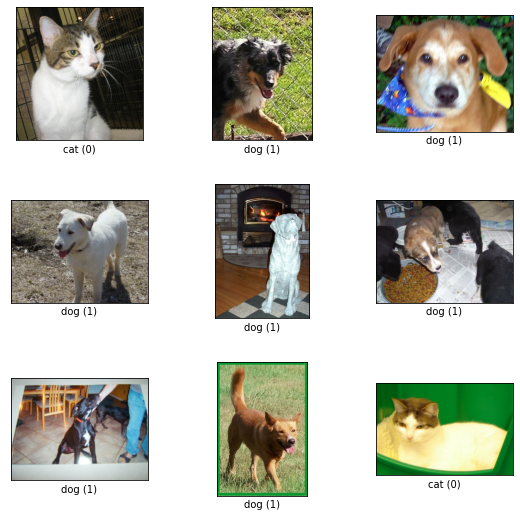

In [18]:
fig = tfds.show_examples(ds_train, ds_info)

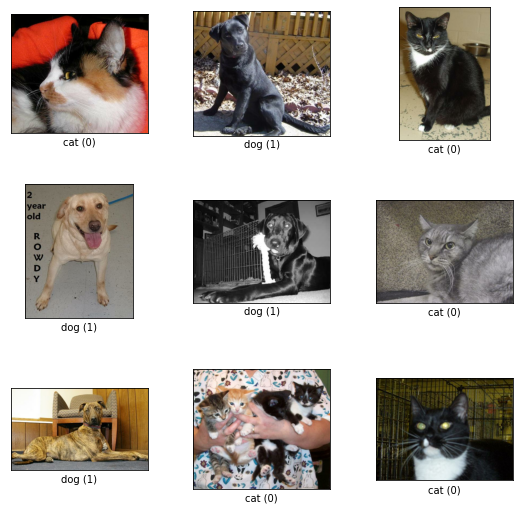

In [19]:
fig = tfds.show_examples(ds_test, ds_info)

### 3.2 Data Preprocessing

In [20]:
# Í∞Å Ï±ÑÎÑêÎ≥Ñ ÏµúÎåìÍ∞íÏù∏ 255Î°ú Ï†ïÍ∑úÌôî(normalize)
# Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Í∞Ä Ï†úÍ∞ÅÍ∞ÅÏù¥ÎØÄÎ°ú 224, 224Î°ú ÌÜµÏùºÏãúÌÇ®Îã§.

def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

In [21]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

* Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÌÜµÌï¥ Î™®Îç∏ ÌïôÏäµ Ï†Ñ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º preprocessing Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§.

### 4. ResNet Modeling

### 4.1 Building Blocks

**[ResNet Í∏∞Î≥∏ Î∏îÎ°ù Íµ¨ÏÑ±ÌïòÍ∏∞]**
* **ResNet-34**ÏôÄ **ResNet-50** ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏßÅÏ†ë ÎßåÎì§Ïñ¥Î≥∏Îã§.
* Î∞òÎ≥µÎ¨∏Í≥º Ï°∞Í±¥Î¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ **ResNet-34**, **ResNet-50**, **Plain-34**, **Plain-50** ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Î™®Îëê ÏÉùÏÑ±Ìï† Ïàò ÏûàÎäî Î∏îÎ°ùÏùÑ ÎßåÎì§Ïñ¥Î≥∏Îã§.
* Ïö∞ÏÑ† **ResNet-34**ÏôÄ **ResNet-50**ÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Î∏îÎ°ùÏùò Í≥µÌÜµÏ†êÍ≥º Ï∞®Ïù¥Ï†êÏùÑ Ï∞æÏïÑÎ≥∏Îã§.

**[Í≥µÌÜµÏ†ê]**
* conv blockÏù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Î∏îÎ°ù Íµ¨Ï°∞Î•º Í∞ÅÍ∞Å 3, 4, 6, 3Í∞úÏî© Î∞òÎ≥µÌï¥ÏÑú ÏåìÏùÄ ÌòïÌÉúÎùºÎäî Í≥µÌÜµÏ†êÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§.

**[Ï∞®Ïù¥Ï†ê]**
* ResNet-34ÏôÄ ResNet-50Ïùò Î∏îÎ°ù ÎÇ¥Î∂Ä Íµ¨ÏÑ±
  * ResNet-34Ïùò Í≤ΩÏö∞ BlockÏùÄ 3x3 kernelÏù∏ Convolution layerÎ°úÎßå Íµ¨ÏÑ±ÎêòÏñ¥Ïûà
  * ResNet-50ÏùÄ 1x1 ConvolutionÏù¥ ÏïûÎí§Î°ú Î∂ôÏñ¥ Îçî ÎßéÏùÄ Î†àÏù¥Ïñ¥Î•º Ìïú Î∏îÎ°ù ÎÇ¥Ïóê Í∞ÄÏßÄÍ≤å ÎêúÎã§.

[**[ResNet-50 Ï£ºÏùòÏÇ¨Ìï≠]**](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006)
* conv3_1, conv4_1, conv5_1Ïùò Î∏îÎ°ùÏóêÏÑú `stride`=2Î°ú Ï†ïÏùò
* conv2_x, conv3_x, conv4_x, conv5_x ÏÇ¨Ïù¥Ïùò shortcut connectionÏùÄ `stride`=2Î°ú Ï†ïÏùò


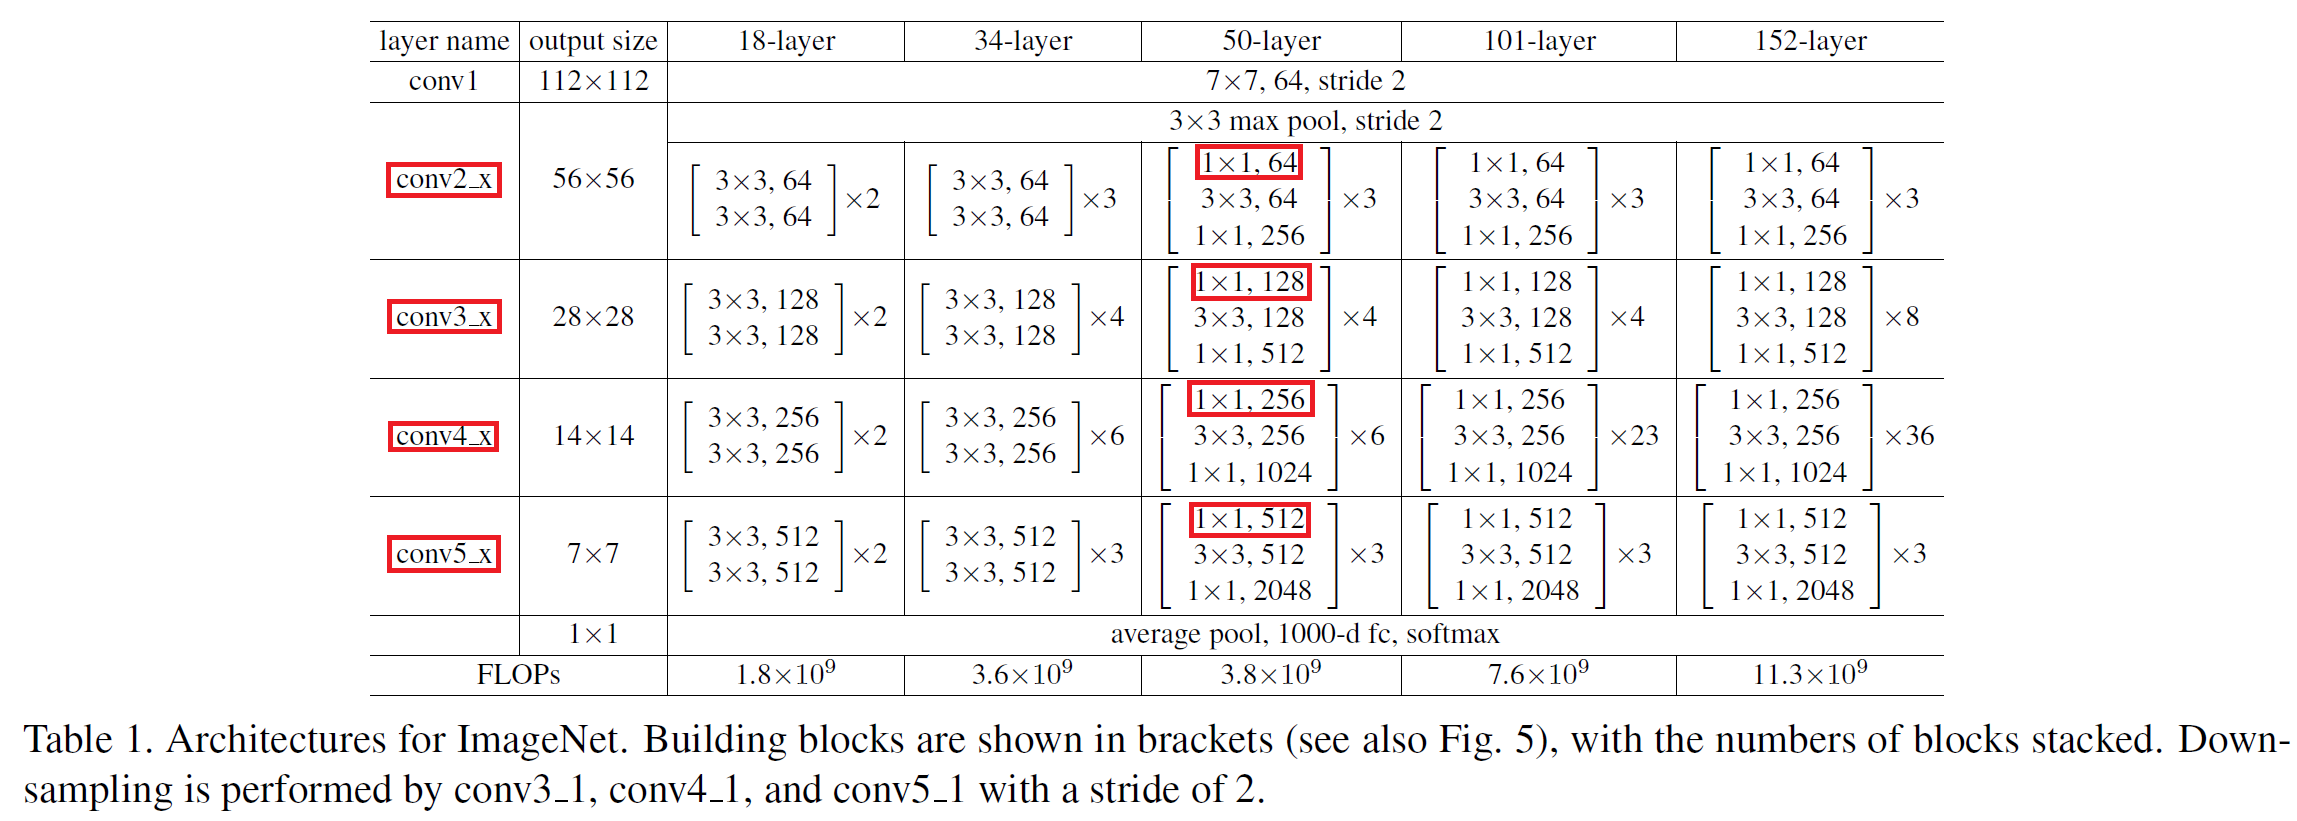

In [3]:
# is_50 : True ‚Üí resnet_50
# is_plain :True ‚Üí no shortcut connection    
def build_resnet_block(input_layer, num_cnn=3, channel=64, block_num=1,is_50 = False, is_plain = False):
    # ÏûÖÎ†• Î†àÏù¥Ïñ¥
    x = input_layer
    if not is_50:
    # CNN Î†àÏù¥Ïñ¥
        for cnn_num in range(num_cnn):
            identity = x
            x = Conv2D(
                filters=channel,
                kernel_size=(3,3),
                strides=(1,1),
                kernel_initializer='he_normal',
                padding='same',
                use_bias=False
            )(x)
            x = BatchNormalization()(x)
            x = Activation(activations.relu)(x)
            x = Conv2D(
                filters=channel,
                kernel_size=(3,3),
                strides=(1,1),
                kernel_initializer='he_normal',
                padding='same',
                use_bias=False
            )(x)
            x = BatchNormalization()(x)
            if not is_plain:
                identity_channel = identity.shape.as_list()[-1]    

                if identity_channel != channel:
                    identity = Conv2D(channel, kernel_size=(1,1), strides=(1,1), use_bias=False, padding="same")(identity)
                # shortcut connection
                x = Add()([x,identity])
                x = Activation(activations.relu)(x)   
            else:
                pass
    else :
        for cnn_num in range(num_cnn):
            # channelÏù¥ 64Ïù∏ Í≤ΩÏö∞
            if channel==64:
                identity = x
                x = Conv2D(
                    filters=channel,
                    kernel_size=(1,1),
                    strides=(1,1),
                    kernel_initializer='he_normal',
                    padding='valid',
                    use_bias=False
                )(x)
                x = BatchNormalization()(x)
                x = Activation(activations.relu)(x)
                x = Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    strides=(1,1),
                    kernel_initializer='he_normal',
                    padding='same',
                    use_bias=False
                )(x)
                x = BatchNormalization()(x)
                x = Activation(activations.relu)(x)
                x = Conv2D(
                    filters=channel * 4,
                    kernel_size=(1,1),
                    strides=(1,1),
                    kernel_initializer='he_normal',
                    padding='valid',
                    use_bias=False
                )(x)
                x = BatchNormalization()(x)

                if not is_plain:
                    if cnn_num==0:

                        identity_channel = identity.shape.as_list()[-1]

                        if identity_channel != channel:
                            identity = Conv2D(filters=channel*4, kernel_size=(1, 1), strides=2, use_bias=False, padding="valid")(identity)
                        # shortcut connection
                        x = Add()([x,identity])
                        x = Activation(activations.relu, axis = 3)(x)

                    else:
                        identity_channel = identity.shape.as_list()[-1]

                        if identity_channel != channel:
                            identity = Conv2D(filters=channel*4, kernel_size=(1, 1), strides=1, use_bias=False, padding="valid")(identity)
                        # shortcut connection
                        x = Add()([x,identity])
                        x = Activation(activations.relu, axis = 3)(x)      
                else:
                    pass

            # channelÏù¥ 64Í∞Ä ÏïÑÎãå Í≤ΩÏö∞
            else:
                identity = x
                if cnn_num==0:
                    x = Conv2D(
                        filters=channel,
                        kernel_size=(1,1),
                        strides=(2,2),
                        kernel_initializer='he_normal',
                        padding='valid',
                        use_bias=False
                    )(x)
                else:
                    x = Conv2D(
                        filters=channel,
                        kernel_size=(1,1),
                        strides=(1,1),
                        kernel_initializer='he_normal',
                        padding='valid',
                        use_bias=False
                    )(x)                    
                x = BatchNormalization()(x)
                x = Activation(activations.relu)(x)
                x = Conv2D(
                    filters=channel,
                    kernel_size=(3,3),
                    strides=(1,1),
                    kernel_initializer='he_normal',
                    padding='same',
                    use_bias=False
                )(x)
                x = BatchNormalization()(x)
                x = Activation(activations.relu)(x)
                x = Conv2D(
                    filters=channel * 4,
                    kernel_size=(1,1),
                    strides=(1,1),
                    kernel_initializer='he_normal',
                    padding='valid',
                    use_bias=False
                )(x)
                x = BatchNormalization()(x)

                if not is_plain:
                    if cnn_num==0:

                        identity_channel = identity.shape.as_list()[-1]

                        if identity_channel != channel:
                            identity = Conv2D(filters=channel*4, kernel_size=(1, 1), strides=2, use_bias=False, padding="valid")(identity)
                        # shortcut connection
                        x = Add()([x,identity])
                        x = Activation(activations.relu, axis = 3)(x)

                    else:
                        identity_channel = identity.shape.as_list()[-1]

                        if identity_channel != channel:
                            identity = Conv2D(filters=channel*4, kernel_size=(1, 1), strides=1, use_bias=False, padding="valid")(identity)
                        # shortcut connection
                        x = Add()([x,identity])
                        x = Activation(activations.relu, axis = 3)(x)      
                else:
                    pass

    return x

### 4.2 Complete Model

In [4]:
def build_resnet(input_shape=(32,32,3),
              num_cnn_list=[3,4,6,3],
              channel_list=[64,128,256,512],
              num_classes=10, is_50 = False, is_plain = False):
    
    assert len(num_cnn_list) == len(channel_list) #Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ Ï†ÑÏóê config listÎì§Ïù¥ Í∞ôÏùÄ Í∏∏Ïù¥Ïù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
    if is_50:
        num_cnn_list = [3,4,6,3]
        channel_list = [64,128,256,512]
        num_classes = 10
        
    input_layer = Input(shape=input_shape)  # input layerÎ•º ÎßåÎì§Ïñ¥Îë°ÎãàÎã§.
    output = input_layer
    #conv1Ï∏µ
    output = ZeroPadding2D(padding=(3, 3))(output)
    output = Conv2D(filters=64,
                       kernel_size = (7,7),
                       strides = (2,2)
                       )(output)
    output = BatchNormalization()(output)
    
    #conv2_x pooling
    output = MaxPooling2D(pool_size = (3,3),
                          strides = (2,2))(output)    
    # config listÎì§Ïùò Í∏∏Ïù¥ÎßåÌÅº Î∞òÎ≥µÌï¥ÏÑú Î∏îÎ°ùÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_resnet_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i,
            is_50=is_50,
            is_plain=is_plain
        )    
    output = AveragePooling2D(padding = 'same')(output)
    output = Flatten(name='flatten')(output)
    output = Dense(512, activation='relu', name='fc1')(output)    
    output = Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

### 4.2.1 ResNet-34

In [5]:
resnet_34 = build_resnet(input_shape=(224,224,3), is_50 = False)
resnet_34.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

### 4.2.2 ResNet-50

* ResNet-50 Î™®Îç∏ ÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÎ©¥ `x = Add()([x,identity])`Î∂ÄÎ∂ÑÏóêÏÑú ÏóêÎü¨ Î∞úÏÉù.
* ÏõêÏù∏ÏùÑ Ï†ïÌôïÌûà Ï∞æÏùÑ ÏàòÍ∞Ä ÏóÜÏñ¥ ResNet-50 Î™®Îç∏ÏùÄ Îî∞Î°ú Íµ¨ÌòÑÌïòÏòÄÏùå.

### 4.2.3 Plain-34

In [7]:
plain_resnet_34 = build_resnet(input_shape=(224,224,3), is_50 = False, is_plain = True)
plain_resnet_34.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 230, 230, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 112, 112, 64)      9472      
                                                                 
 batch_normalization_33 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                           

### 4.2.4 Plain-50

In [9]:
plain_resnet_50 = build_resnet(input_shape=(224,224,3), is_50 = True, is_plain = True)
plain_resnet_50.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 230, 230, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_69 (Conv2D)          (None, 112, 112, 64)      9472      
                                                                 
 batch_normalization_66 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                           

### 5. Model Training

* `BATCH_SIZE`Ïùò Í≤ΩÏö∞ ÎÖºÎ¨∏Í≥º ÎèôÏùºÌïòÍ≤å 256ÏúºÎ°ú ÏßÑÌñâÌïòÍ≥†Ïûê ÌïòÏòÄÏúºÎÇò,
* GPUÏö©Îüâ Î¨∏Ï†úÎ°ú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï¥ ÎÖºÎ¨∏Î≥¥Îã§ `BATCH_SIZE`Î•º ÎÇÆÏ∂∞ÏÑú ÏßÑÌñâÌïòÏòÄÏùå.

In [22]:
BATCH_SIZE = 32
EPOCH = 15

In [23]:
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

### 5.1 ResNet-34

In [24]:
resnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_34 = resnet_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[20%:]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[:20%]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15
581/581 [==============================] - 926s 2s/step - loss: 1.0049 - accuracy: 0.4989 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 2/15
581/581 [==============================] - 884s 2s/step - loss: 0.6996 - accuracy: 0.4977 - val_loss: 0.6993 - val_accuracy: 0.4948
Epoch 3/15
581/581 [==============================] - 883s 2s/step - loss: 0.6983 - accuracy: 0.5030 - val_loss: 0.7030 - val_accuracy: 0.4996
Epoch 4/15
581/581 [==============================] - 884s 2s/step - loss: 0.6982 - accuracy: 0.4966 - val_loss: 0.7021 - val_accuracy: 0.4970
Epoch 5/15
581/581 [==============================] - 884s 2s/step - loss: 0.6970 - accuracy: 0.5009 - val_loss: 0.6961 - val_accuracy: 0.4987
Epoch 6/15
581/581 [==============================] - 884s 2s/step - loss: 0.6965 - accuracy: 0.4974 - val_loss: 0.7229 - val_accuracy: 0.5000
Epoch 7/15
581/581 [==============================] - 884s 2s/step - loss: 0.6970 - accuracy: 0.4955 - val_loss: 0.6943 - val_accuracy: 0.4985

### 5.2 Plain-34

In [25]:
plain_resnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_34 = plain_resnet_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[20%:]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[:20%]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15
581/581 [==============================] - 901s 2s/step - loss: 0.9496 - accuracy: 0.4978 - val_loss: 0.6975 - val_accuracy: 0.5024
Epoch 2/15
581/581 [==============================] - 858s 1s/step - loss: 0.6990 - accuracy: 0.4998 - val_loss: 0.6946 - val_accuracy: 0.5041
Epoch 3/15
581/581 [==============================] - 859s 1s/step - loss: 0.6987 - accuracy: 0.5027 - val_loss: 0.6952 - val_accuracy: 0.4994
Epoch 4/15
581/581 [==============================] - 857s 1s/step - loss: 0.7001 - accuracy: 0.4997 - val_loss: 0.7000 - val_accuracy: 0.4948
Epoch 5/15
581/581 [==============================] - 852s 1s/step - loss: 0.6989 - accuracy: 0.4980 - val_loss: 0.6943 - val_accuracy: 0.5043
Epoch 6/15
581/581 [==============================] - 852s 1s/step - loss: 0.6975 - accuracy: 0.4960 - val_loss: 0.6963 - val_accuracy: 0.4974
Epoch 7/15
581/581 [==============================] - 853s 1s/step - loss: 0.6965 - accuracy: 0.5002 - val_loss: 0.6937 - val_accuracy: 0.4968

### 5.3 Plain-50

In [26]:
plain_resnet_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_50 = plain_resnet_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[20%:]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[:20%]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15
581/581 [==============================] - 167s 264ms/step - loss: 1.0427 - accuracy: 0.4965 - val_loss: 0.8976 - val_accuracy: 0.5355
Epoch 2/15
581/581 [==============================] - 149s 257ms/step - loss: 0.7259 - accuracy: 0.4929 - val_loss: 0.6948 - val_accuracy: 0.4946
Epoch 3/15
581/581 [==============================] - 148s 254ms/step - loss: 0.6993 - accuracy: 0.5005 - val_loss: 0.7180 - val_accuracy: 0.4983
Epoch 4/15
581/581 [==============================] - 148s 254ms/step - loss: 0.6980 - accuracy: 0.4994 - val_loss: 0.6938 - val_accuracy: 0.5181
Epoch 5/15
581/581 [==============================] - 148s 254ms/step - loss: 0.6976 - accuracy: 0.4973 - val_loss: 0.6939 - val_accuracy: 0.4994
Epoch 6/15
581/581 [==============================] - 148s 255ms/step - loss: 0.6977 - accuracy: 0.4992 - val_loss: 0.7004 - val_accuracy: 0.4957
Epoch 7/15
581/581 [==============================] - 148s 255ms/step - loss: 0.6979 - accuracy: 0.5009 - val_loss: 0.6938 -

### 6. Visualization Loss and Accuracy

* ResNet-50Ïùò Í≤∞Í≥ºÎäî `history`Ïóê Ï†ÄÏû•ÎêòÏñ¥ÏûàÎäî Î¶¨Ïä§Ìä∏Î•º Í∞ÄÏ†∏ÏôîÎã§.
* `Attachment,ResNet-50.ipynb` Ï∞∏Ï°∞

In [1]:
history_resnet_50 = {'loss': [0.9199658632278442,
  0.6989937424659729,
  0.6979464292526245,
  0.6971418857574463,
  0.699307382106781,
  0.6992338299751282,
  0.6973613500595093,
  0.6971814632415771,
  0.6974321007728577,
  0.6970767378807068,
  0.6959982514381409,
  0.6981124877929688,
  0.6967800259590149,
  0.6966327428817749,
  0.6959354281425476],
 'accuracy': [0.49720311164855957,
  0.49870815873146057,
  0.5003770589828491,
  0.5064054131507874,
  0.4975777864456177,
  0.4905802607536316,
  0.5033347606658936,
  0.4966602027416229,
  0.500968873500824,
  0.5033372640609741,
  0.5005382895469666,
  0.5007535815238953,
  0.4983326196670532,
  0.49714499711990356,
  0.5074763298034668],
 'val_loss': [0.6968756318092346,
  0.6950346827507019,
  0.7036826610565186,
  0.6954041123390198,
  0.6942451000213623,
  0.6986580491065979,
  0.6978269815444946,
  0.6986823081970215,
  0.6953768730163574,
  0.6936815977096558,
  0.6934104561805725,
  0.6956963539123535,
  0.693341851234436,
  0.6933925151824951,
  0.703016996383667],
 'val_accuracy': [0.5071428418159485,
  0.5034782886505127,
  0.5002164244651794,
  0.501724123954773,
  0.5,
  0.49112555384635925,
  0.4886956512928009,
  0.4882608652114868,
  0.5023707151412964,
  0.5015151500701904,
  0.5,
  0.49978262186050415,
  0.5056276917457581,
  0.49891775846481323,
  0.4906926453113556]}

### 6.1 Loss

In [2]:
import matplotlib.pyplot as plt

plt.plot(history_resnet_34.history['loss'], 'r')
plt.plot(history_resnet_50['loss'], 'k')
plt.plot(history_plain_34.history['loss'], 'g')
plt.plot(history_plain_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['resnet_34', 'resnet_50', 'plain_34', 'plain_50'], loc='upper left')
plt.show()

NameError: ignored

* ÏûòÎ™ª ÌÅ¥Î¶≠Ìï¥ÏÑú Ï∂úÎ†•Îêú Í≤∞Í≥ºÎ¨ºÏù¥ ÏÇ¨ÎùºÏ°åÎã§.üò•

### 6.2 Accuracy

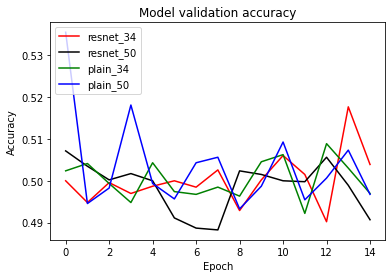

In [29]:
plt.plot(history_resnet_34.history['val_accuracy'], 'r')
plt.plot(history_resnet_50['val_accuracy'], 'k')
plt.plot(history_plain_34.history['val_accuracy'], 'g')
plt.plot(history_plain_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['resnet_34', 'resnet_50', 'plain_34', 'plain_50'], loc='upper left')
plt.show()

### 7. Result and Conclusion

* LossÏóê ÎåÄÌïú Í≤∞Í≥ºÍ∞Ä ÏÇ¨ÎùºÏßÑ Í¥ÄÍ≥ÑÎ°ú Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑÎßå Î≥¥Í≥†ÏÑú ÌåêÎã®Ìï¥Î≥∏Îã§.
* Îã§Îßå, ÌïôÏäµ Ïãú Ï∂úÎ†•Îêú LossÎ•º Î≥¥Î©¥ ÌïôÏäµÏù¥ ÏßÑÌñâÎê®Ïóê Îî∞Îùº Ï¥àÎ∞òÏóê ÎÇÆÏïÑÏßÄÎã§ ÏùºÏ†ï epoch Ïù¥ÌõÑ ÏùºÏ†ïÌï¥ÏßÄÎäî ÏñëÏÉÅÏùÑ ÎùÑÍ≥† ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. 
* Ï†ïÌôïÎèÑÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ 0.49 ~ 0.52 ÏÇ¨Ïù¥Î•º ÏôîÎã§Í∞îÎã§ÌïòÍ≥† ÏûàÏúºÎ©∞,
* Ï†ïÌôïÎèÑÎßå ÎëêÍ≥† ÌåêÎã®ÌñàÏùÑ Îïå ÎÑ§ Í∞úÏùò Î™®Îç∏ÏóêÏÑú ÌÅ∞ Ï∞®Ïù¥Î•º ÌôïÏù∏Ìï† Ïàò ÏóÜÏóàÎã§.  
* LossÍ∞Ä Í≥ÑÏÜçÌï¥ÏÑú Ï§ÑÏñ¥Îì§ÏßÄ Î™ªÌïòÍ≥† accuracyÏóêÏÑúÎèÑ Î™®Îç∏ Î≥Ñ ÌÅ∞ Ï∞®Ïù¥Î•º ÌôïÏù∏ Ìï† Ïàò ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Îß§Í∞úÎ≥ÄÏàòÏùò ÏàòÏ†ïÏù¥ ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
* ÏúÑ ÌïôÏäµ Ïãú ÏÑ§Ï†ïÌïú Îß§Í∞úÎ≥ÄÏàòÎäî ÎÖºÎ¨∏ ÏÉÅÏùò Í∞íÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.
* ÎÖºÎ¨∏ÏùÄ cifar-10 Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÏù¥ ÏßÑÌñâÎêú Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

### 8. Retrospection

### 8.1 What was difficult

* Î™®Îç∏ Íµ¨ÌòÑÏù¥ Ïñ¥Î†§Ïõ†Îã§.
* ÏÉùÍ∞ÅÎ≥¥Îã§ ResNet-34ÏôÄ ResNet-50 ÏÇ¨Ïù¥Ïùò Ï∞®Ïù¥Í∞Ä ÎßéÏïÑ ÏΩîÎìúÎ•º ÏßúÎäî Í≤ÉÏù¥ Ïñ¥Î†§Ïõ†Îã§.
* ÌïôÏäµ ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Í∏∏Ïñ¥ Îã§ÏñëÌïú ÏãúÎèÑÎ•º Ìï¥Î≥¥ÏßÄ Î™ªÌïúÍ≤å ÏïÑÏâΩÎã§.

### 8.2 What I found out

* ResNet-34ÏôÄ ResNet-50Ïùò Ï∞®Ïù¥(Building BlockÏùò **[ResNet-50 Ï£ºÏùòÏÇ¨Ìï≠]** Ï∞∏Ï°∞)


### 8.3 What I want to know more about

* top-3, top-5 errorÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏúºÎ©¥ Îçî Ï¢ãÏïòÏùÑ Í≤É Í∞ôÎã§.
```python
import tensorflow as tf
model.compile(optimizer, loss, metrics= [tf.keras.metrics.TopKCategoricalAccuracy(k=5)])
```
* Î™®Îç∏ Íµ¨ÌòÑ Ïãú ÏóêÎü¨Í∞Ä ÎÇ¨Îçò Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ Îçî ÏÇ¥Ìé¥Î¥êÏïº Ìï† Í≤É Í∞ôÎã§. (ResNet-50 Î∂ÄÎ∂Ñ)

### 8.4 Self-Resolution

* Î®∏Î¶ø ÏÜçÏúºÎ°úÎäî Íµ¨ÏÉÅÏùÄ ÎêòÏßÄÎßå, ÏΩîÎìúÎ°ú Íµ¨ÌòÑÌïòÎäî Í≤ÉÏùÄ Îòê Î≥ÑÍ∞úÏùò Î¨∏Ï†úÏù∏ Í≤É Í∞ôÎã§.

**[Reference]**
* https://towardsdatascience.com/understand-and-implement-resnet-50-with-tensorflow-2-0-1190b9b52691
* https://github.com/KaimingHe/deep-residual-networks
* https://hwanny-yy.tistory.com/12
* https://tobigs.gitbook.io/tobigs/deep-learning/computer-vision/resnet-deep-residual-learning-for-image-recognition
* https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice/blob/master/code_practices/ResNet18_CIFAR10_Train.ipynb
* https://stackoverflow.com/questions/42327006/how-to-calculate-top5-accuracy-in-keras

**[Attachment]**
* Attachment.ResNet-50.ipynb